In [38]:
import pandas as pd
train = pd.read_csv("../data/imbd/train.txt",header=None).astype(str).sample(frac=1).reset_index(drop=True)
test = pd.read_csv("../data/imbd/test.txt",header=None).astype(str).sample(frac=1).reset_index(drop=True)

test[1].head(50)

0      10
1       4
2       7
3      10
4       3
5      10
6      10
7       9
8       3
9       9
10      2
11      2
12      4
13      8
14      1
15      3
16     10
17      3
18      4
19      8
20      1
21      2
22      9
23      4
24      3
25      3
26      9
27     10
28     10
29      9
30      2
31      9
32      1
33      7
34     10
35      3
36      7
37      4
38      1
39     10
40      3
41      3
42     10
43     10
44      8
45      1
46      3
47      2
48      7
49      8
Name: 1, dtype: object

In [34]:
from pprint import pprint
from time import time
import logging
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set
#categories = [
    #'alt.atheism',
    #'talk.religion.misc',
#]
# Uncomment the following to do the analysis on all the categories
#categories = None

#print("Loading 20 newsgroups dataset for categories:")
#print(categories)

#print("%d documents" % len(data.filenames))
#print("%d categories" % len(data.target_names))
#print()

# #############################################################################
# Define a pipeline combining a text feature extractor with a simple
# classifier
pipeline = Pipeline(steps = [
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__min_df': ([0]),
    #'vect__max_features': (None, 5000, 10000, 100000),
    #'vect__ngram_range': ((1, 1)),  # unigrams or bigrams
    'tfidf__use_idf': ([False]),
    # 'tfidf__norm': ('l1', 'l2'),
    #'clf__C': ([0.01,0.1]),
    #'clf__penalty': ('l2', 'l1'),
     'clf__max_iter': (1,2),
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters,cv=2, n_jobs=-1, verbose=5, refit = True,return_train_score = True)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameter set:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(train[0], train[1])
    print("done in %0.3fs" % (time() - t0))
    print()
    
    print("scores!")
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        
    print("Best score:")
    print("%0.3f (+/-%0.03f)" % (grid_search.best_score_, std * 2))
    print("with parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    print(grid_search)
    
    

Automatically created module for IPython interactive environment
Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameter set:
{'clf__max_iter': (1, 2), 'tfidf__use_idf': [False], 'vect__min_df': [0]}
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    9.8s remaining:    9.8s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   10.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   10.0s finished
/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


done in 15.034s

scores!
0.204 (+/-0.000) for {'clf__max_iter': 1, 'tfidf__use_idf': False, 'vect__min_df': 0}
0.278 (+/-0.010) for {'clf__max_iter': 2, 'tfidf__use_idf': False, 'vect__min_df': 0}
Best score:
0.278 (+/-0.010)
with parameters set:
	clf__max_iter: 2
	tfidf__use_idf: False
	vect__min_df: 0
GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                        

/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
import matplotlib.pyplot as plt
import numpy as np
#import itertools
#from sklearn.metrics import plot_confusion_matrix

y_pred = grid_search.predict(test[0])
y_test = test[1].to_numpy()


cnf_matrix = confusion_matrix(y_test,y_pred)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,average='micro')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,average='micro')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,average='micro')))
print('Confusion Matrix : \n' + str(cnf_matrix))



Accuracy Score : 0.0
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[   0    0    0    0    0    0    0    0    0 4495  527]
 [   0    0    0    0    0    0    0    0    0 2415 2583]
 [   0    0    0    0    0    0    0    0    0 1983  319]
 [   0    0    0    0    0    0    0    0    0 2021  520]
 [   0    0    0    0    0    0    0    0    0 1958  677]
 [   0    0    0    0    0    0    0    0    0 1249 1058]
 [   0    0    0    0    0    0    0    0    0 1445 1405]
 [   0    0    0    0    0    0    0    0    0 1172 1172]
 [   0    0    0    0    0    0    0    0    0    1    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]


AttributeError: 'DataFrame' object has no attribute 'target_names'

In [ ]:
def pre_process(self,stop_words,min_df,max_features,ngram_upper_bound):
        train_size = len(self.train["text"])
        test_size = len(self.test["text"])
        vertical_stack = pd.concat([self.train, self.test], axis=0)
        tfidf_transformer = TfidfTransformer()
        if max_features > 0:
            vectorizer = CountVectorizer(ngram_range=(1, ngram_upper_bound),min_df = min_df, max_features= max_features,stop_words=stop_words)
        else:
            vectorizer = CountVectorizer(ngram_range=(1, ngram_upper_bound),min_df = min_df,stop_words=stop_words)
        
        formated_data = vectorizer.fit_transform(vertical_stack["text"])
        formated_data = tfidf_transformer.fit_transform(formated_data).toarray()
        self.X_train = formated_data[0:train_size][:]
        self.X_test = formated_data[train_size:][:]

In [4]:
import model
from sklearn.svm import LinearSVC
c = model.Classifier(0,LinearSVC())
param = {
            'vect__min_df': ([0]),
            'tfidf__use_idf': ([False]),
        }
        # additionally by the default settings
        # max_feature = None
        # ngram_range = (1,1)
        # max_df=1.0
        # lowercase=True
        # default C
c.fit(param,5)


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'tfidf__use_idf': [False], 'vect__min_df': [0]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.0s remaining:   25.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.3s finished


KeyboardInterrupt: 

In [ ]:
c.eval_on_test()

In [17]:
from sklearn.tree import DecisionTreeClassifier
ccc = model.Classifier(1,DecisionTreeClassifier())

In [10]:
from sklearn.ensemble import RandomForestClassifier
c3 = model.Classifier(1,RandomForestClassifier())
c3.baseline_fit()

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'tfidf__use_idf': [False], 'vect__min_df': [0]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   12.4s remaining:   18.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.6s finished
/Users/kaan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


done in 19.680s

scores!
0.657 (+/-0.032) for {'tfidf__use_idf': False, 'vect__min_df': 0}
Best score:
0.657 (+/-0.032)
with parameters set:
	tfidf__use_idf: False
	vect__min_df: 0

Evaluation on test set:

Accuracy Score : 0.5594795539033457
Precision Score : 0.5594795539033457
Recall Score : 0.5594795539033457
F1 Score : 0.5594795539033457
Confusion Matrix : 
[[194   7   3   4  10   2   1   3   1   4   5   3   1   5   5  47   7   4
    2  11]
 [  4 201  33  18  27  39  12   5   5   6   2   2  15   2   9   3   0   3
    3   0]
 [  6  59 198  45  17  20   8   5   4   5   0   5   7   1   8   1   2   1
    2   0]
 [  3  48  64 172  32  15  10   6   3   0   2   2  19   4   4   3   2   0
    3   0]
 [  5  38  31  49 182  11  23   8   3   6   4   4  12   2   1   3   1   0
    2   0]
 [  5  69  59  21  16 184   3   4   7   4   2   2   8   4   4   0   1   0
    1   1]
 [  4  18  14  18  17   7 287   9   1   1   2   1   4   3   2   0   2   0
    0   0]
 [ 10  18  20  16  15   9  31 209  23   7

In [3]:
import model
from sklearn.ensemble import AdaBoostClassifier
c4 = model.Classifier(0,AdaBoostClassifier())
c4.baseline_fit()

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'tfidf__use_idf': [False], 'vect__min_df': [0]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.3s remaining:   53.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.7s finished


done in 60.763s

scores!
0.353 (+/-0.010) for {'tfidf__use_idf': False, 'vect__min_df': 0}
Best score:
0.353 (+/-0.010)
with parameters set:
	tfidf__use_idf: False
	vect__min_df: 0

Evaluation on test set:

Accuracy Score : 0.0


ValueError: Mix of label input types (string and number)

In [2]:
import model
from sklearn.tree import DecisionTreeClassifier
ccc = model.Classifier(0,DecisionTreeClassifier())
ccc.baseline_fit()
ccc.learning_curve([0.33,0.66,1.0])

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'tfidf__use_idf': [False], 'vect__min_df': [0]}
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   58.1s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   58.7s finished


done in 114.709s

scores!
0.242 (+/-0.008) for {'tfidf__use_idf': False, 'vect__min_df': 0}
Best score:
0.242 (+/-0.008)
with parameters set:
	tfidf__use_idf: False
	vect__min_df: 0

Evaluation on test set:

Accuracy Score : 0.0
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0
Confusion Matrix : 
[[   0    0    0    0    0    0    0    0    0 2211  511  551  509  491
   269  279  201]
 [   0    0    0    0    0    0    0    0    0  494 1786  238  287  373
   499  708  613]
 [   0    0    0    0    0    0    0    0    0  700  258  277  281  309
   150  192  135]
 [   0    0    0    0    0    0    0    0    0  597  339  271  343  350
   234  244  163]
 [   0    0    0    0    0    0    0    0    0  515  371  263  338  419
   276  281  172]
 [   0    0    0    0    0    0    0    0    0  255  477  159  184  268
   346  387  231]
 [   0    0    0    0    0    0    0    0    0  261  741  195  210  298
   359  445  341]
 [   0    0    0    0    0    0    0    0    0  216  700  147  16

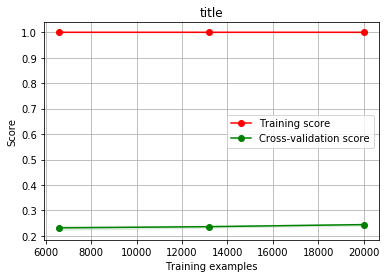

In [4]:
ccc.learning_curve([0.33,0.66,1.0])
